In [1]:
# load dataset
import os
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import simplejson as json

df = pd.read_csv("/users/akuppam/documents/Hprog/Py/rnb1015_2.csv")
df.head(5)

,date,region,marketing,visits,br,inq,gb,cb,nb,ss,ts,listings
0,1/1/16,AMR,NotPaid,1256288,6043,66022,6071,571,5500,485968.08000,144695.894200,10242216
1,1/1/16,AMR,Paid,189297,1092,11806,743,2,741,0.00000,14138.809600,2133795
2,1/1/16,UK,NotPaid,201797,435,9662,436,33,403,72698.92472,8317.105056,3561696
3,1/1/16,UK,Paid,55934,88,2749,61,1,60,0.00000,815.336426,890424
4,1/1/16,CE,NotPaid,200786,573,9250,435,31,404,40490.73159,12016.782410,3062480


In [2]:
df = pd.read_csv("/users/akuppam/documents/Hprog/Py/rnb1015_2.csv")
df = df.loc[(df['region'] == 'AMR') & (df['marketing'] == 'NotPaid')]
df = df[~(df['nb'] < 0)]
df.describe()
df.index = pd.to_datetime(df.date)
cols = ["nb"]
df = df[cols]
df.columns = ['y']
df.head()

,y
date,
2016-01-01,5500
2016-01-02,6513
2016-01-03,7602
2016-01-04,8871
2016-01-05,9828


In [ ]:
import warnings
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

p = 9
d = 1
q = 2

series = df['y']

# apply model
model = ARIMA(series, order=(p,d,q))
model_fit = model.fit(transparams=True)
print(model_fit.summary())

# Store predictions
import numpy as np
X = series.values
history = [x for x in X]
predictions = list()
for t in range(len(X)):
	model = ARIMA(history, order=(p,d,q))
	model_fit = model.fit(transparams=True)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = X[t]
	history.append(obs)
	# calculate out of sample error
#	error = mean_squared_error(X, predictions)
#	mape = np.mean(abs((X-predictions)/X))
#	print('error = ', error)
#	print('mape = ', mape)

# Get forecast 442 steps ahead in future (10/15/2018 to 12/31/2019)
yhat = model_fit.forecast(steps=442)
series_arima = predictions.append(yhat)


/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:163: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:163: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1018
Model:                 ARIMA(9, 1, 2)   Log Likelihood               -8177.294
Method:                       css-mle   S.D. of innovations            743.469
Date:                Mon, 19 Nov 2018   AIC                          16380.587
Time:                        12:39:06   BIC                          16444.620
Sample:                    01-02-2016   HQIC                         16404.903
                         - 10-15-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6307     11.852     -0.222      0.824     -25.859      20.598
ar.L1.D.y      0.8469      0.036     23.636      0.000       0.777       0.917
ar.L2.D.y     -0.8346      0.047    -17.687      0.0

/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [11]:
yhat[0]

array([8183.98109516, 8129.69035835, 7591.88693519, 6988.57698589,
       6751.60451699, 7020.4164664 , 7566.22349793, 7982.26109054,
       7985.04500391, 7605.12322716, 7141.10938713, 6927.85742049,
       7097.02502938, 7499.81356851, 7833.88925236, 7868.94570423,
       7603.85704197, 7249.68097572, 7064.04289219, 7165.47074656,
       7460.43669441, 7725.91113949, 7777.01949706, 7594.72080435,
       7326.38838372, 7168.74952579, 7225.03743015, 7439.30037694,
       7648.29812867, 7705.18428267, 7582.00187507, 7380.20902259,
       7248.93682271, 7275.90543252, 7430.20467566, 7593.34648255,
       7649.79308562, 7568.37221126, 7417.75508325, 7310.17883161,
       7318.75238037, 7428.83208876, 7555.18231231, 7607.68721759,
       7555.4096024 , 7443.85817721, 7356.89413816, 7354.49352538,
       7432.21975796, 7529.3594184 , 7576.19418422, 7543.96606313,
       7462.01912947, 7392.55289433, 7384.11856065, 7438.37012657,
       7512.53647482, 7553.094347  , 7534.42505741, 7474.75144

In [13]:
import warnings
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

p = 9
d = 1
q = 2

series = df['y']

model = ARIMA(series, order=(p,d,q))
model_fit = model.fit(transparams=True)
print(model_fit.summary())
output = model_fit.forecast()

pred_fcst = model_fit.predict(start=1, end=1018, dynamic=False)
arima_forecast = model_fit.forecast(442)
arima_series = pred_fcst.append(arima_forecast)
        
#yhat = output[0]
#predictions = list()
#predictions.append(yhat)
#X = series.values
#obs = X[t]
#history.append(obs)

# Get forecast 442 steps ahead in future (10/15/2018 to 12/31/2019)
#yhat1 = model_fit.forecast(steps=442)
#series_arima = predictions.append(yhat1)

# calculate out of sample error
#error = mean_squared_error(X, output)
#mape = np.mean(abs((X-predictions)/X))
#print('error = ', error)
#print('mape = ', mape)

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:163: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:163: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1018
Model:                 ARIMA(9, 1, 2)   Log Likelihood               -8177.294
Method:                       css-mle   S.D. of innovations            743.469
Date:                Mon, 19 Nov 2018   AIC                          16380.587
Time:                        16:00:41   BIC                          16444.620
Sample:                    01-02-2016   HQIC                         16404.903
                         - 10-15-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6307     11.852     -0.222      0.824     -25.859      20.598
ar.L1.D.y      0.8469      0.036     23.636      0.000       0.777       0.917
ar.L2.D.y     -0.8346      0.047    -17.687      0.0

TypeError: can only concatenate list (not "tuple") to list

In [8]:
print(model_fit.summary())
print(model_fit.params)

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 1018
Model:                 ARIMA(9, 1, 2)   Log Likelihood               -8177.294
Method:                       css-mle   S.D. of innovations            743.469
Date:                Mon, 19 Nov 2018   AIC                          16380.587
Time:                        13:01:04   BIC                          16444.620
Sample:                    01-02-2016   HQIC                         16404.903
                         - 10-15-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6307     11.852     -0.222      0.824     -25.859      20.598
ar.L1.D.y      0.8469      0.036     23.636      0.000       0.777       0.917
ar.L2.D.y     -0.8346      0.047    -17.687      0.0

In [9]:
model_fit.fittedvalues.to_csv('model_fit_fittedvalues.csv')

In [5]:
output

(array([7450.87608376]),
 array([743.46927501]),
 array([[5993.70308114, 8908.04908639]]))

In [6]:
model_fit.fittedvalues

date
2016-01-02      -2.630690
2016-01-03      -8.420581
2016-01-04    -226.504847
2016-01-05    -529.002952
2016-01-06   -1047.945822
2016-01-07   -1654.195716
2016-01-08   -1717.231198
2016-01-09    -430.457412
2016-01-10     462.417464
2016-01-11     666.739167
2016-01-12     349.786145
2016-01-13      27.231178
2016-01-14    -337.575213
2016-01-15    -693.806113
2016-01-16    -326.837709
2016-01-17     831.630727
2016-01-18     792.284147
2016-01-19     116.890163
2016-01-20      -6.336713
2016-01-21    -332.071638
2016-01-22    -852.522090
2016-01-23    -347.471416
2016-01-24     687.550453
2016-01-25     749.294278
2016-01-26       2.308304
2016-01-27    -175.334045
2016-01-28    -452.427072
2016-01-29    -680.417311
2016-01-30    -230.749715
2016-01-31     580.665305
                 ...     
2018-09-16    1171.993082
2018-09-17     292.946031
2018-09-18     -50.021348
2018-09-19    -149.360226
2018-09-20    -829.911758
2018-09-21    -883.717714
2018-09-22      65.088101
2018-09

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:163: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:163: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


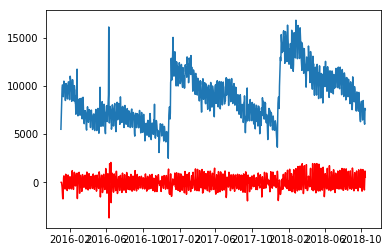

In [19]:
model = ARIMA(series, order=(9, 1, 2))
results_ARIMA = model.fit(transparams=True)  
plt.plot(series)
plt.plot(results_ARIMA.fittedvalues, color='red')

#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:163: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:163: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


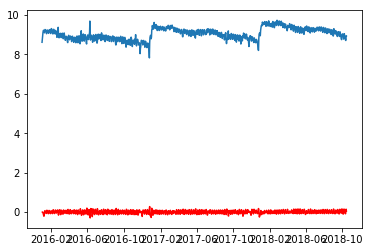

In [21]:
series_log = np.log(series)
model = ARIMA(series_log, order=(9, 1, 2))
results_ARIMA = model.fit(transparams=True)  
plt.plot(series_log)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [22]:
results_ARIMA.fittedvalues

date
2016-01-02    0.000020
2016-01-03    0.008386
2016-01-04   -0.026917
2016-01-05   -0.069445
2016-01-06   -0.136913
2016-01-07   -0.206475
2016-01-08   -0.197218
2016-01-09   -0.026182
2016-01-10    0.060347
2016-01-11    0.075892
2016-01-12    0.028468
2016-01-13   -0.015748
2016-01-14   -0.045901
2016-01-15   -0.067001
2016-01-16   -0.023015
2016-01-17    0.095971
2016-01-18    0.086649
2016-01-19    0.009760
2016-01-20   -0.014903
2016-01-21   -0.041510
2016-01-22   -0.080493
2016-01-23   -0.031711
2016-01-24    0.081461
2016-01-25    0.082127
2016-01-26   -0.000496
2016-01-27   -0.024306
2016-01-28   -0.049526
2016-01-29   -0.076472
2016-01-30   -0.019319
2016-01-31    0.066750
                ...   
2018-09-16    0.134115
2018-09-17    0.031047
2018-09-18   -0.017094
2018-09-19   -0.023736
2018-09-20   -0.085028
2018-09-21   -0.086898
2018-09-22    0.010629
2018-09-23    0.145619
2018-09-24    0.035612
2018-09-25   -0.016872
2018-09-26    0.026901
2018-09-27   -0.022259
2018-0

In [ ]:
series_arima.to_csv("series_arima")